In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,10)
%matplotlib notebook
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [15]:
df = pd.read_csv('dataset/Training Data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [16]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [20]:
df.describe(include=['O']).T

,count,unique,top,freq
Married/Single,252000,2,single,226272
House_Ownership,252000,3,rented,231898
Car_Ownership,252000,2,no,176000
Profession,252000,51,Physician,5957
CITY,252000,317,Vijayanagaram,1259
STATE,252000,29,Uttar_Pradesh,28400


<IPython.core.display.Javascript object>


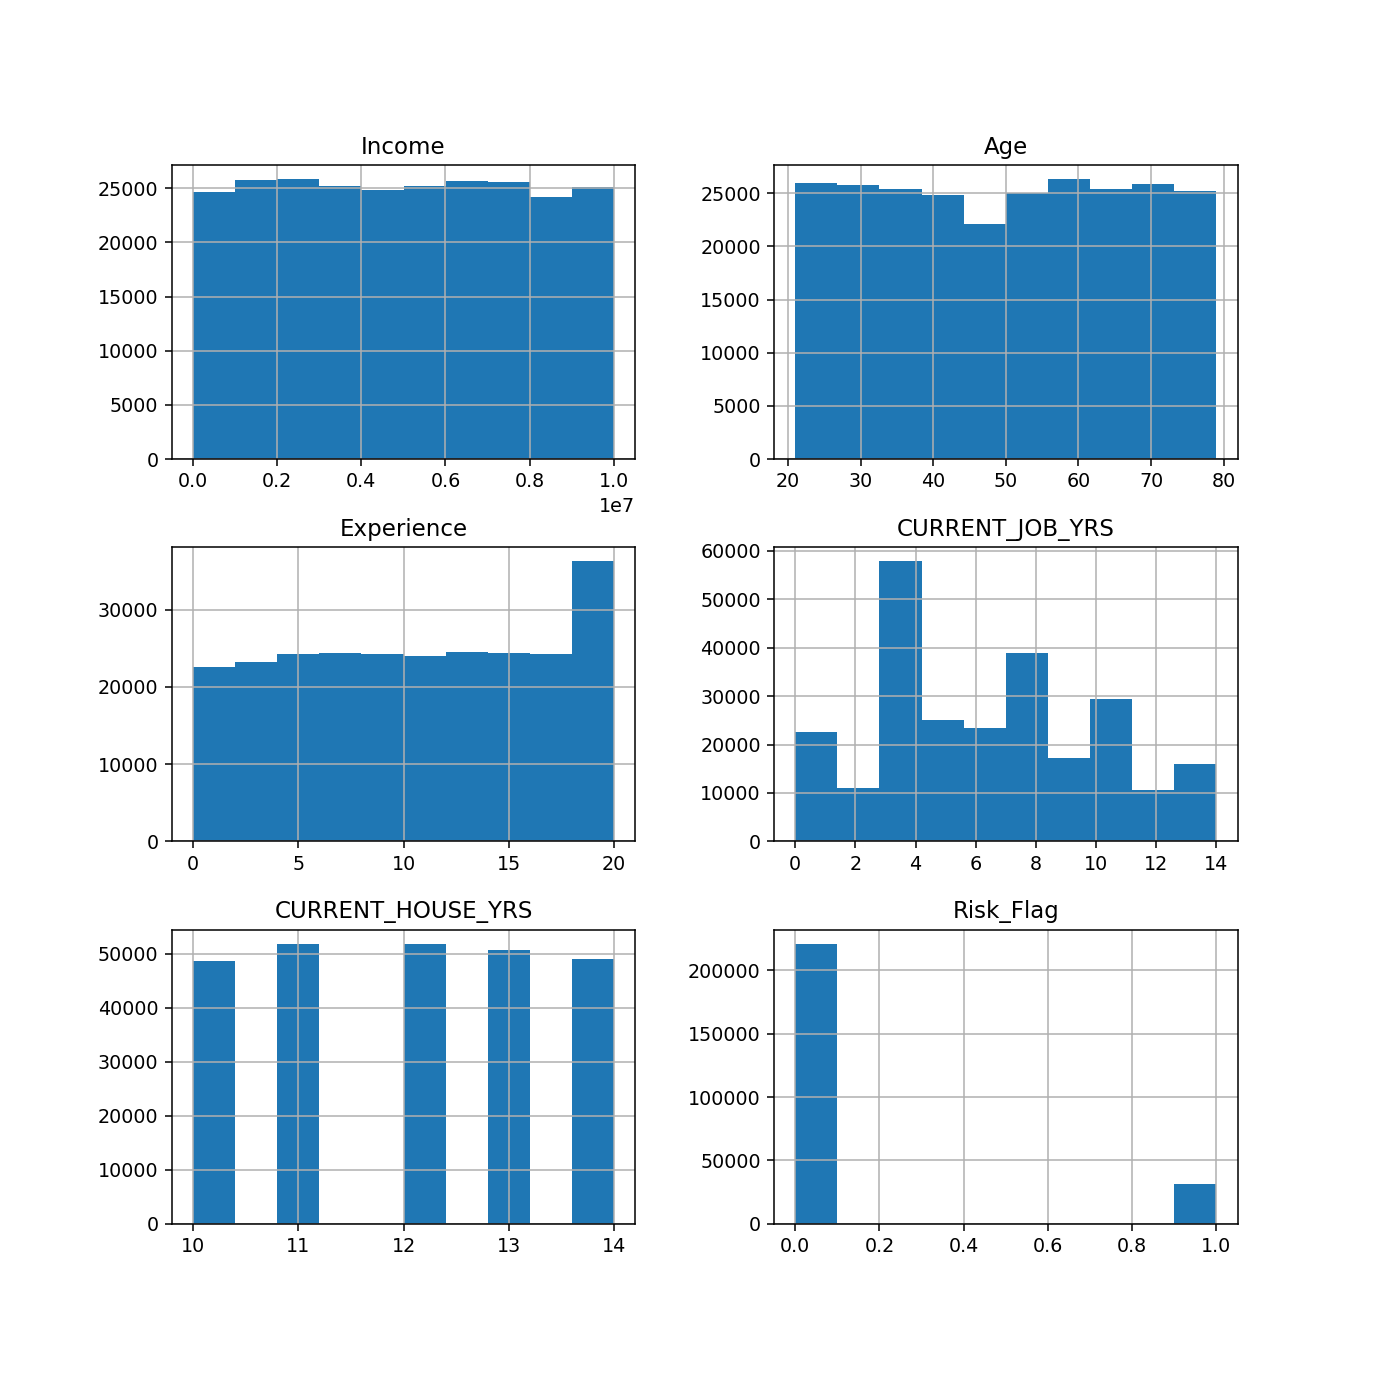

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'CURRENT_JOB_YRS'}>],
       [<AxesSubplot:title={'center':'CURRENT_HOUSE_YRS'}>,
        <AxesSubplot:title={'center':'Risk_Flag'}>]], dtype=object)

In [69]:
df.hist()

<IPython.core.display.Javascript object>


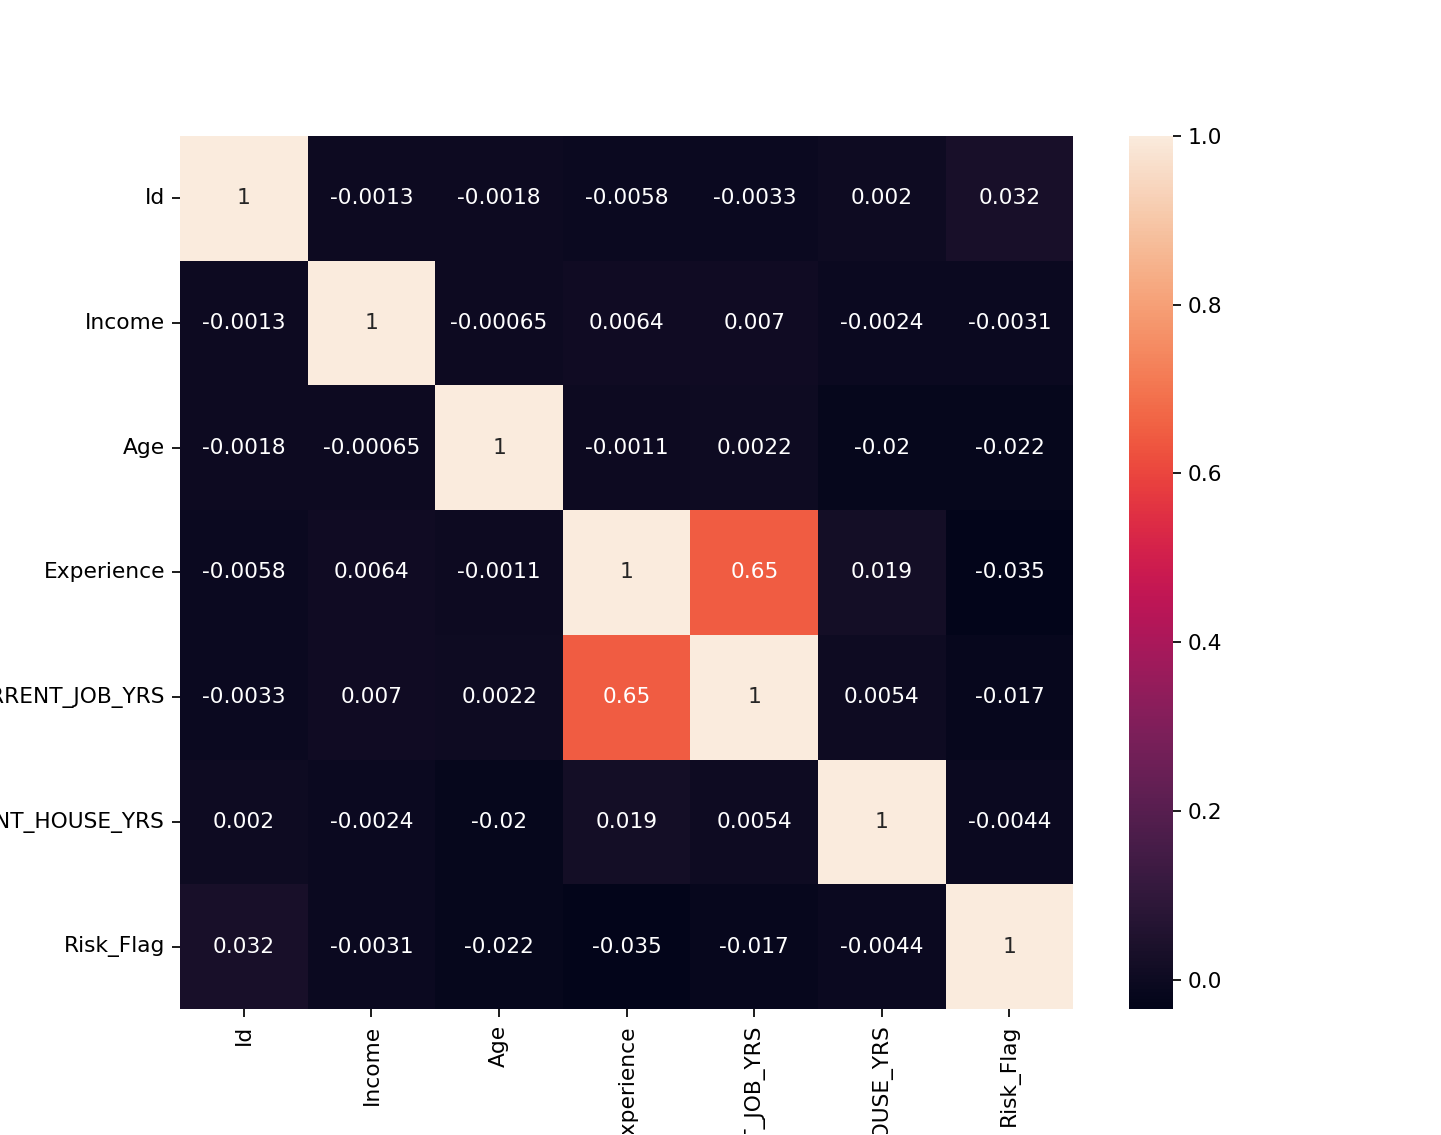

<AxesSubplot:>

In [33]:
sns.heatmap(df.corr() , annot = True)

In [34]:
df.drop('Id' , axis = 1 , inplace = True)

In [35]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [36]:
df.rename(columns={"Married/Single":"Married_Single"}, inplace=True)
df.head()


,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


<IPython.core.display.Javascript object>


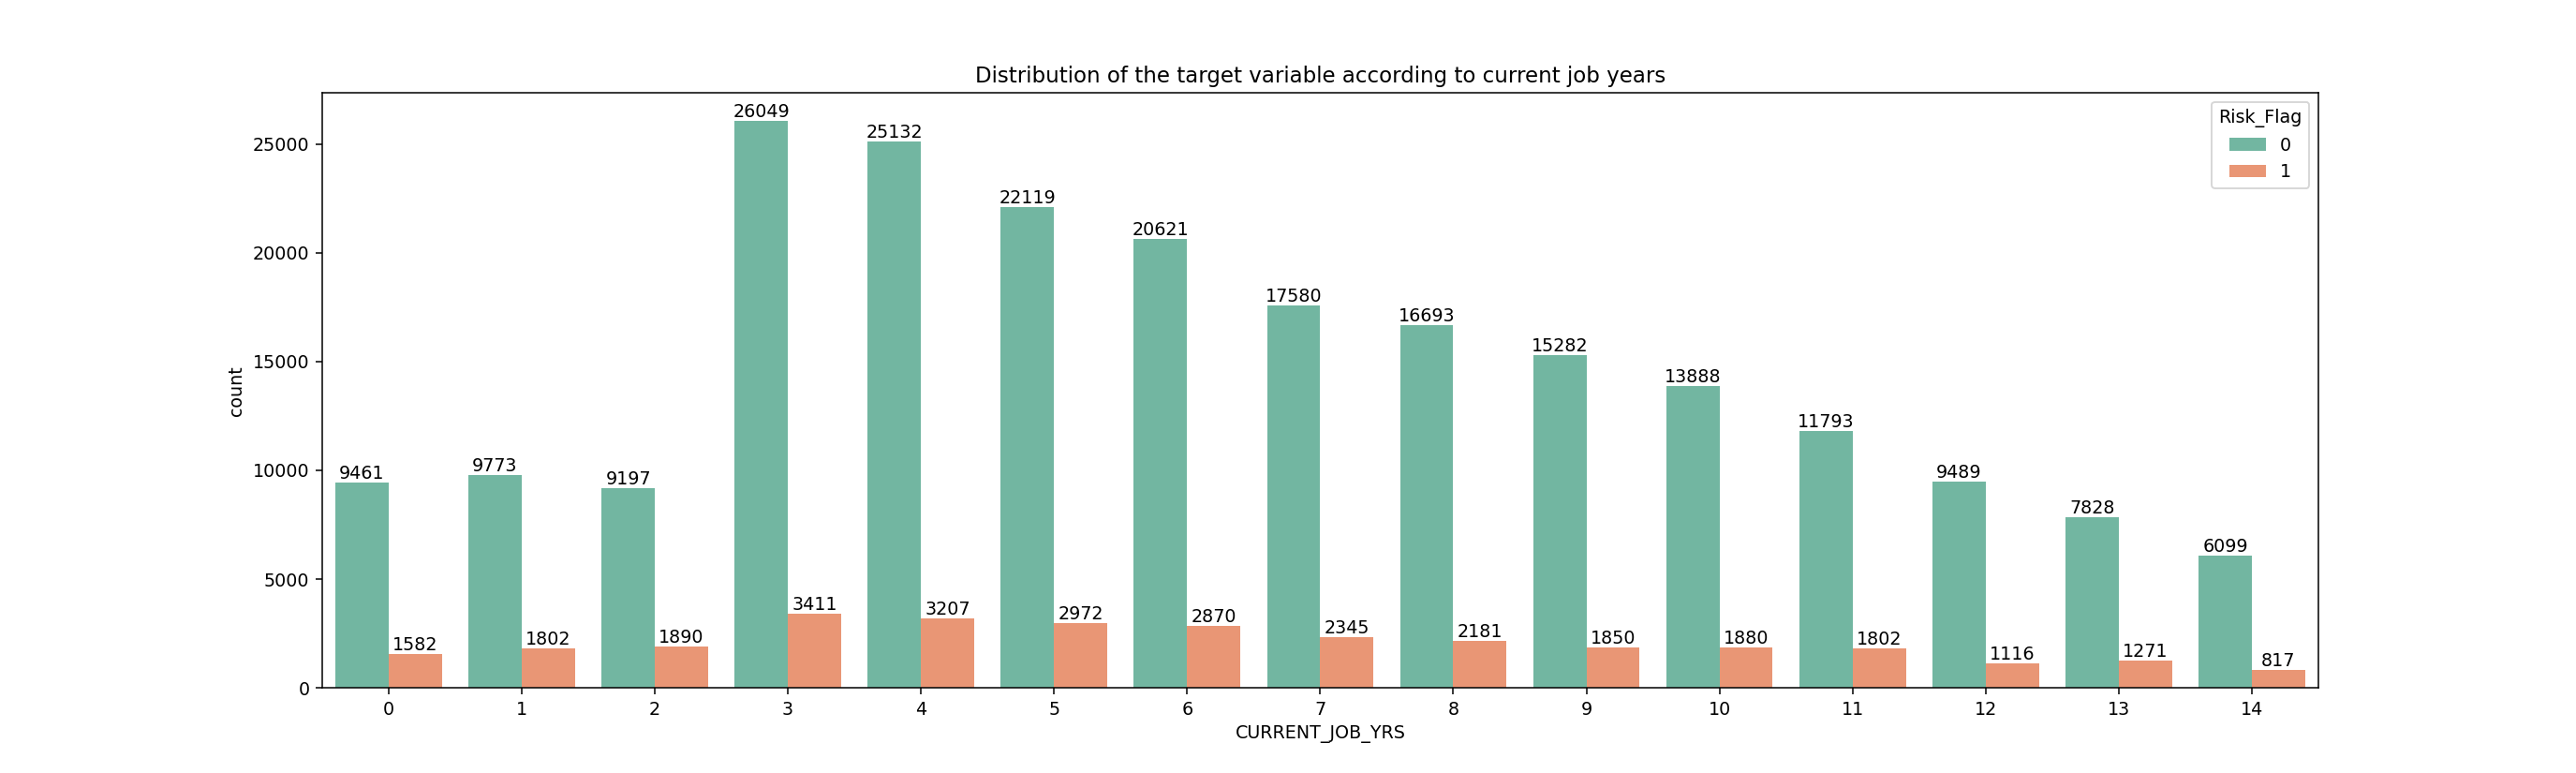

In [67]:
plt.figure(figsize=(20,6))
ax = sns.countplot(data = df , x=df["CURRENT_JOB_YRS"].sort_values(), hue= "Risk_Flag", palette="Set2")
plt.title('Distribution of the target variable according to current job years')
for bars in ax.containers:
        ax.bar_label(bars);

# City 

In [73]:
df.groupby('CITY').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

CITY
Bhubaneswar         32.619440
Gwalior             27.272727
Bettiah[33]         26.695842
Kochi               25.286160
Raiganj             23.955432
                      ...    
Bangalore            3.713893
Bijapur              3.496503
Sultan_Pur_Majra     3.409091
Dehradun             2.634593
Gandhinagar          2.611367
Name: Risk_Flag, Length: 317, dtype: float64

In [74]:
df.groupby('CITY').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False).head(40)

CITY
Bhubaneswar           32.619440
Gwalior               27.272727
Bettiah[33]           26.695842
Kochi                 25.286160
Raiganj               23.955432
Purnia[26]            23.886640
Barasat               23.870220
Sikar                 23.845194
Buxar[37]             23.147208
Satna                 22.568093
Kottayam              22.536946
Kavali                22.506083
Mysore[7][8][9]       22.056834
Bardhaman             21.915820
Gandhidham            21.646746
Imphal                21.554770
Ghaziabad             20.873269
Ramagundam[27]        20.844687
Muzaffarnagar         20.808383
Ahmedabad             20.493066
Munger                20.465116
Mathura               20.334262
Thiruvananthapuram    20.333333
Hazaribagh            20.209059
Guntur[13]            19.875000
Mango                 19.685039
Udaipur               19.306931
Ratlam                19.196429
Moradabad             19.175911
Shahjahanpur          19.134775
Sri_Ganganagar        19.093851
Sri

In [75]:
df.groupby(['STATE', "CITY"]).Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

STATE           CITY            
Odisha          Bhubaneswar         32.619440
Madhya_Pradesh  Gwalior             27.272727
Bihar           Bettiah[33]         26.695842
Kerala          Kochi               25.286160
West_Bengal     Raiganj             23.955432
                                      ...    
Karnataka       Bangalore            3.713893
                Bijapur              3.496503
Delhi           Sultan_Pur_Majra     3.409091
Uttarakhand     Dehradun             2.634593
Gujarat         Gandhinagar          2.611367
Name: Risk_Flag, Length: 317, dtype: float64

In [76]:
df["STATE"].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [77]:
df["STATE"] = df["STATE"].apply(lambda x: "Uttar_Pradesh" if x == "Uttar_Pradesh[5]" else x)

In [78]:
df["STATE"].value_counts()

Uttar_Pradesh        29143
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [79]:
df.groupby('STATE').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

STATE
Manipur              21.554770
Tripura              16.810878
Kerala               16.709733
Jammu_and_Kashmir    15.898876
Madhya_Pradesh       15.436907
Odisha               14.255045
Rajasthan            14.083279
Jharkhand            13.329615
Chhattisgarh         13.328117
Himachal_Pradesh     13.325330
Assam                13.169074
Bihar                13.058645
Telangana            13.011696
West_Bengal          12.813525
Haryana              12.420786
Uttar_Pradesh        11.803864
Gujarat              11.772440
Puducherry           11.653873
Andhra_Pradesh       11.602166
Maharashtra          11.325405
Mizoram              11.071849
Delhi                10.455373
Tamil_Nadu           10.316261
Karnataka            10.029523
Chandigarh            9.298780
Punjab                9.004237
Uttarakhand           7.097118
Sikkim                4.605263
Name: Risk_Flag, dtype: float64

# Model

In [80]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [83]:
dummy_df = df.drop(["CITY", "STATE"], axis=1)
dummy_df = pd.get_dummies(dummy_df, drop_first=True)

In [84]:
dummy_df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married_Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,1303834,23,3,3,13,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,9,13,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3991815,66,4,4,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,6256451,41,2,2,12,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5768871,47,11,3,14,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
X= dummy_df.drop(["Risk_Flag"], axis=1)
y= dummy_df["Risk_Flag"]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [94]:
X_train.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married_Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
13714,8132252,72,7,6,13,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51718,7915651,64,8,3,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99982,6272029,49,12,7,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
107150,1832125,54,13,12,14,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
94564,7954133,31,7,4,12,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
X_train.columns

Index(['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Married_Single_single', 'House_Ownership_owned',
       'House_Ownership_rented', 'Car_Ownership_yes', 'Profession_Analyst',
       'Profession_Architect', 'Profession_Army_officer', 'Profession_Artist',
       'Profession_Aviator', 'Profession_Biomedical_Engineer',
       'Profession_Chartered_Accountant', 'Profession_Chef',
       'Profession_Chemical_engineer', 'Profession_Civil_engineer',
       'Profession_Civil_servant', 'Profession_Comedian',
       'Profession_Computer_hardware_engineer', 'Profession_Computer_operator',
       'Profession_Consultant', 'Profession_Dentist',
       'Profession_Design_Engineer', 'Profession_Designer',
       'Profession_Drafter', 'Profession_Economist', 'Profession_Engineer',
       'Profession_Fashion_Designer', 'Profession_Financial_Analyst',
       'Profession_Firefighter', 'Profession_Flight_attendant',
       'Profession_Geologist', 'Profession_Graphic_Desig

In [88]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)